In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from echolens import simulation

In [3]:
folder = '/Users/antoidicherianlonappan/Workspace/scratch'
model = ['d0','s0']
nside = 1024

In [4]:
sky = simulation.CMBbharatSky(folder,nside,model)

In [5]:
alm = sky.observed_cmb_alms(0)

alm2lenmap: using 8 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:02.001880] (38.0%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.060156] (1.1%)  
  build_angles                         :  [0:00:02.062051] (39.2%)  
  synthesis general (STANDARD)         :  [0:00:00.787972] (15.0%)  
  gclm2lenmap                          :  [0:00:05.247061] (99.7%)  
  synthesis general (GRAD_ONLY)        :  [0:00:02.383885] (45.3%)  
  polrot (ducc)                        :  [0:00:00.013122] (0.2%)  
  Total                                :  [0:00:05.263973] d:h:m:s:mus


Total Sky: 100%|██████████| 20/20 [00:09<00:00,  2.11Freq/s]


In [6]:
cmbspectra = simulation.CMBspectra()
cl_len = cmbspectra.get_lensed_spectra(dl=False)

Text(0.5, 1.0, 'Harmonic ILC results')

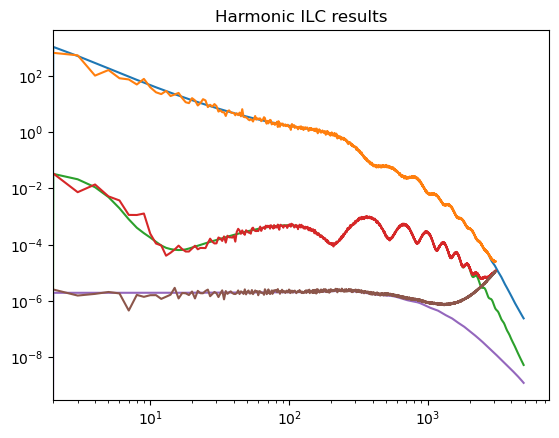

In [15]:
plt.loglog(cl_len['tt'])
plt.loglog(hp.alm2cl(alm[0,0]))
plt.loglog(cl_len['ee'])
plt.loglog(hp.alm2cl(alm[0,1]))
plt.loglog(cl_len['bb'])
plt.loglog(hp.alm2cl(alm[0,2]))
plt.xlim(2,None)
plt.title('Harmonic ILC results')